In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [6]:
 df.smoking_history.replace({
     "No Info":0,
     "never":1,
     "former":2,
     "current":3,
     "not current":4,
     "ever":5
 },inplace=True)

In [7]:
df.gender.replace({
    "Female":0,
    "Male":1,
    "Other":2
},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


(array([8.6570e+03, 3.1394e+04, 5.0373e+04, 7.3890e+03, 1.7160e+03,
        3.7900e+02, 7.3000e+01, 8.0000e+00, 4.0000e+00, 7.0000e+00]),
 array([10.01 , 18.578, 27.146, 35.714, 44.282, 52.85 , 61.418, 69.986,
        78.554, 87.122, 95.69 ]),
 <BarContainer object of 10 artists>)

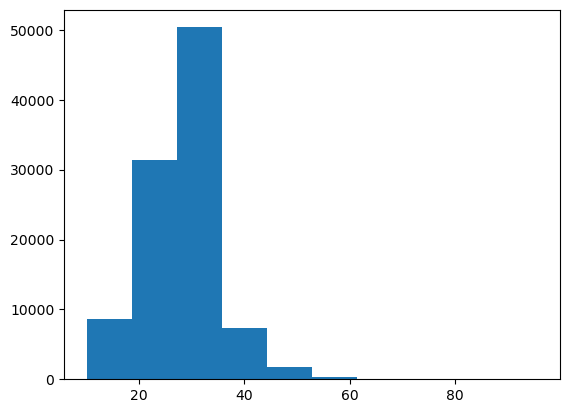

In [9]:
plt.hist(df["bmi"])

In [10]:
bmi_min,bmi_max= df.bmi.quantile([0.1,0.85])
df=df[(df.bmi<bmi_max)&(df.bmi>bmi_min)]

In [11]:
bmi_min,bmi_max

(19.18, 32.92)

(array([ 3682.,  4557.,  5408.,  5714.,  5963., 31314.,  5468.,  4937.,
         4314.,  3596.]),
 array([19.19 , 20.562, 21.934, 23.306, 24.678, 26.05 , 27.422, 28.794,
        30.166, 31.538, 32.91 ]),
 <BarContainer object of 10 artists>)

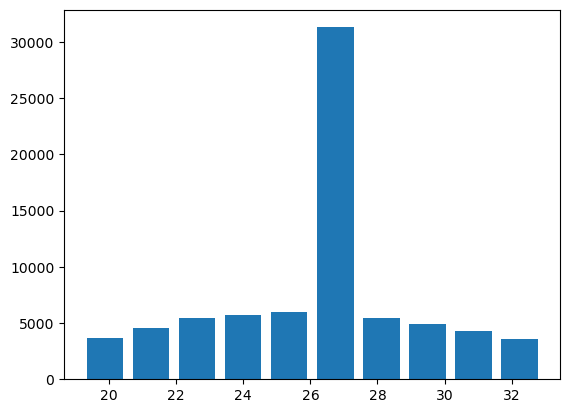

In [12]:
plt.hist(df["bmi"], rwidth=0.8)

In [13]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000
mean,0.418035,44.551577,0.069510,0.040879,1.316091,26.425428,5.505680,137.144144,0.071045
std,0.493591,21.226322,0.254321,0.198011,1.413247,3.035973,1.057838,39.716768,0.256901
min,0.000000,0.080000,0.000000,0.000000,0.000000,19.190000,3.500000,80.000000,0.000000
25%,0.000000,27.000000,0.000000,0.000000,0.000000,24.510000,4.800000,100.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,2.000000,27.320000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,32.910000,9.000000,300.000000,1.000000


(array([21433.,     0., 23209., 22583.,     0.,  5685.,   391.,   396.,
          381.,   875.]),
 array([ 80., 102., 124., 146., 168., 190., 212., 234., 256., 278., 300.]),
 <BarContainer object of 10 artists>)

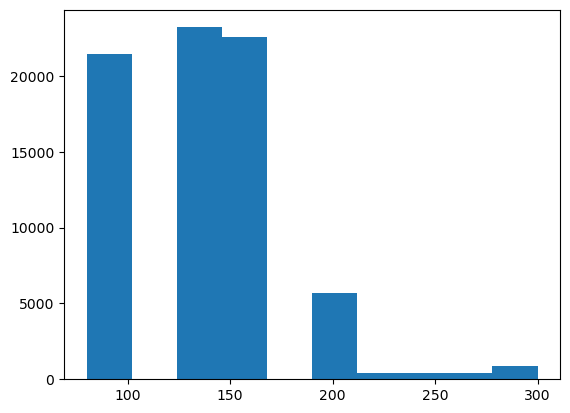

In [14]:
plt.hist(df["blood_glucose_level"])

In [16]:
blood_glucose_level_min,blood_glucose_level_max= df.blood_glucose_level.quantile([0.1,0.9])
df=df[(df.blood_glucose_level>blood_glucose_level_min)&(df.blood_glucose_level<blood_glucose_level_max)]

In [17]:
blood_glucose_level_min,blood_glucose_level_max

(85.0, 200.0)

In [18]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,56559.000000,56559.000000,56559.000000,56559.000000,56559.000000,56559.000000,56559.000000,56559.000000,56559.000000
mean,0.416132,44.155502,0.066638,0.037465,1.309995,26.391563,5.475887,136.660478,0.050850
std,0.493351,21.164160,0.249397,0.189901,1.412048,3.036187,1.035680,23.304041,0.219692
min,0.000000,0.080000,0.000000,0.000000,0.000000,19.190000,3.500000,90.000000,0.000000
25%,0.000000,27.000000,0.000000,0.000000,0.000000,24.450000,4.800000,126.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,27.320000,5.800000,145.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,2.000000,27.320000,6.200000,158.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,32.910000,9.000000,160.000000,1.000000


(array([ 5389.,  5378.,     0.,     0.,     0., 11639.,     0., 11570.,
            0., 22583.]),
 array([ 90.,  97., 104., 111., 118., 125., 132., 139., 146., 153., 160.]),
 <BarContainer object of 10 artists>)

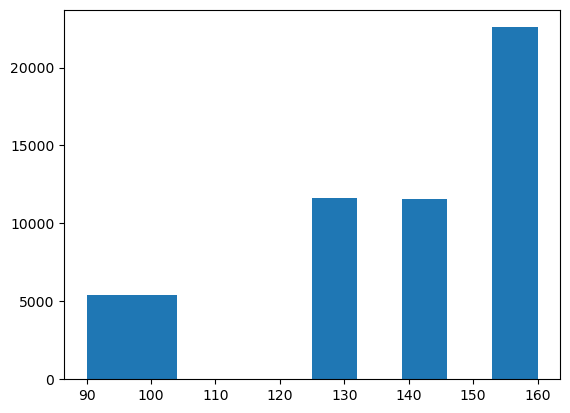

In [19]:
plt.hist(df["blood_glucose_level"])

In [20]:
x=df.drop(["diabetes"],axis="columns")
y=df["diabetes"]

In [21]:
from imblearn.over_sampling import SMOTE as sm

smote=sm(sampling_strategy="minority")

x_sm,y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    53683
1    53683
Name: diabetes, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import cross_val_score 

In [24]:
model = [LinearRegression(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]
for i in model:
    score =cross_val_score(i,x_train, y_train,cv=10)
    print(i ,score.mean())

LinearRegression() 0.49386665604829105
LogisticRegression() 0.8415569742873055
DecisionTreeClassifier() 0.9701601962387659
RandomForestClassifier() 0.9700903679083799
GaussianNB() 0.8335469116018798


In [25]:
rf_regressor=RandomForestClassifier()
rf_regressor.fit(x_train,y_train)
rf_regressor.score(x_test,y_test)

0.970755332029431

<Axes: >

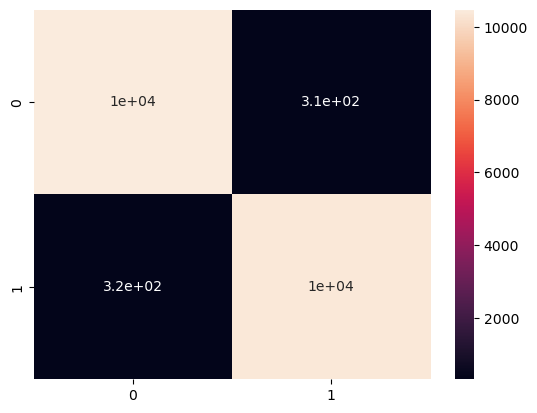

In [30]:
y=rf_regressor.predict(x_test).round()
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix ,classification_report
result=confusion_matrix(y,y_test)
sns.heatmap(result,annot=True)

In [33]:
3.2e+02

320.0

In [34]:
1e+04

10000.0

In [35]:
import pickle
with open("rf_regressor.pickle","wb") as f:
    pickle.dump(rf_regressor,f)